In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#LOADING ALL THE FILES
def load_csv_files(directory):
    dataframes = {}  # Dictionary to store dataframes
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            # Create the dataframe name from the file name (without .csv)
            df_name = file.replace('.csv', '')
            # Load the CSV into a dataframe
            dataframes[df_name] = pd.read_csv(os.path.join(directory, file))
    return dataframes

In [25]:
# Directory containing the CSV files
csv_directory = '..\database'

# Load all CSV files into a dictionary of dataframes
dataframes = load_csv_files(csv_directory)

# Create a list of dataframes
dataframe_list = list(dataframes.values())

# Print the names of all dataframes loaded
print("Dataframes loaded:", list(dataframes.keys()))

Dataframes loaded: ['ACES', 'ADMR', 'ADRO', 'AKRA', 'AMMN', 'AMRT', 'ANTM', 'ARTO', 'ASII', 'BBCA', 'BBNI', 'BBRI', 'BBTN', 'BMRI', 'BRIS', 'BRPT', 'BUKA', 'CPIN', 'ESSA', 'EXCL', 'GOTO', 'ICBP', 'INCO', 'INDF', 'INKP', 'INTP', 'ISAT', 'ITMG', 'JSMR', 'KLBF', 'MAPI', 'MBMA', 'MDKA', 'MEDC', 'MTEL', 'PGAS', 'PGEO', 'PTBA', 'SIDO', 'SMGR', 'SMRA', 'TLKM', 'TOWR', 'UNTR', 'UNVR']


In [26]:
for name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date']) 
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
    dataframes[name] = df.set_index('Date')  # Set Tanggal as index for alignment

combined_data = pd.concat(
    {name: df['Change %'] for name, df in dataframes.items()}, axis=1, join="inner"
)

if isinstance(combined_data.columns, pd.MultiIndex):
    combined_data.columns = combined_data.columns.droplevel(0)  # Drop unnecessary level if MultiIndex exists
else:
    combined_data.columns = dataframes.keys()  # Assign column names directly

In [27]:
def pairwise_correlation(data, stock1, stock2):
    pair_data = data[[stock1, stock2]].dropna()  # Drop rows with NaN
    if pair_data.empty:  # If no valid rows, return NaN
        return np.nan
    return pair_data.corr().iloc[0, 1]  # Return the correlation coefficient

In [28]:
#Stopping per pair when encountering NaN
correlation_matrix = pd.DataFrame(index=combined_data.columns, columns=combined_data.columns)

for stock1 in combined_data.columns:
    for stock2 in combined_data.columns:
        correlation_matrix.loc[stock1, stock2] = pairwise_correlation(combined_data, stock1, stock2)

In [29]:
correlation_matrix = correlation_matrix.astype(float)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          ACES      ADMR      ADRO      AKRA      AMMN      AMRT      ANTM  \
ACES  1.000000  0.122743  0.018033  0.193862  0.067700  0.069224  0.038712   
ADMR  0.122743  1.000000  0.270148  0.160318  0.004677  0.019120  0.198506   
ADRO  0.018033  0.270148  1.000000  0.164197 -0.046270  0.025275  0.184516   
AKRA  0.193862  0.160318  0.164197  1.000000  0.016749 -0.008604  0.205313   
AMMN  0.067700  0.004677 -0.046270  0.016749  1.000000  0.012498 -0.038296   
AMRT  0.069224  0.019120  0.025275 -0.008604  0.012498  1.000000  0.146035   
ANTM  0.038712  0.198506  0.184516  0.205313 -0.038296  0.146035  1.000000   
ARTO  0.104979  0.134639  0.065448  0.077113 -0.135469  0.119563  0.171573   
ASII  0.099759 -0.049544  0.111632  0.115672 -0.102402  0.221269  0.137239   
BBCA  0.099800  0.016310  0.128876  0.040142 -0.051956  0.169378  0.084380   
BBNI  0.119372  0.040072  0.043382  0.076010  0.045589  0.231988  0.138055   
BBRI  0.133167  0.058267  0.148757  0.06479

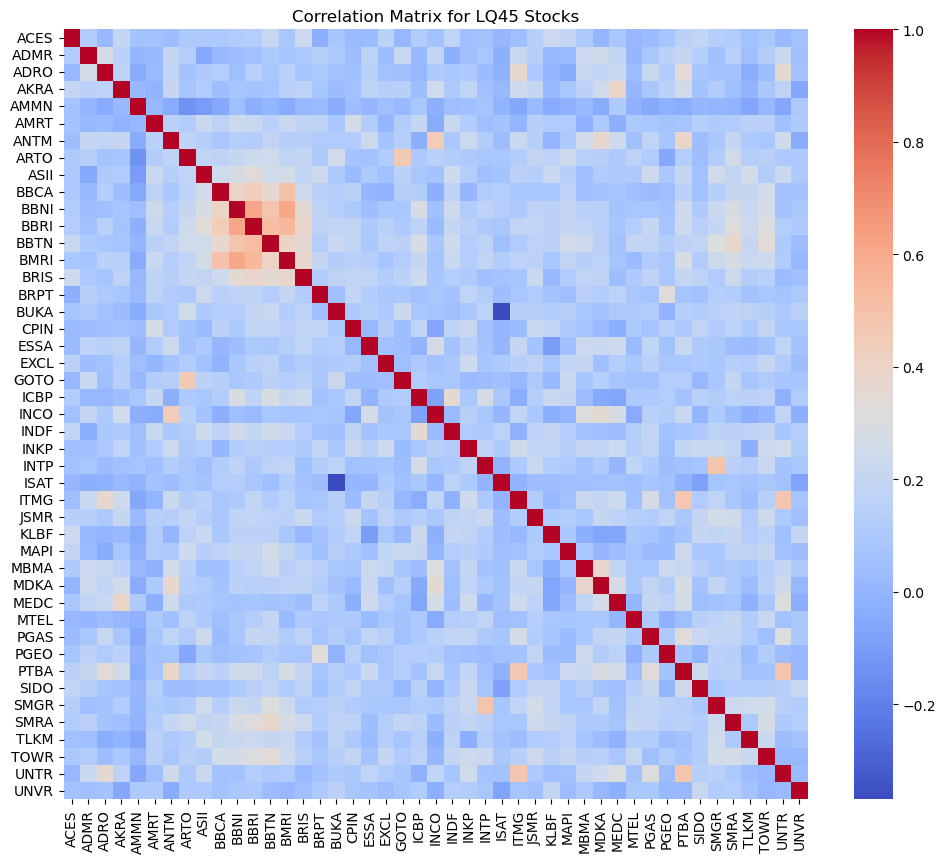

In [30]:
# Optional: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for LQ45 Stocks")
plt.show()

In [31]:
#Saving the Graph
correlation_matrix.to_csv("correlation_matrix.csv")